In [12]:
#Importing packages
from selenium import webdriver
from pymongo import MongoClient
from collections import Counter
import pandas as pd
import json
import twint
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import nest_asyncio

In [13]:
driver = webdriver.Chrome()
driver.get('https://www.poynter.org/ifcn-covid-19-misinformation/?covid_countries=48837&covid_rating=0&covid_fact_checkers=0&orderby=views&order=DESC')

In [14]:
client = MongoClient('mongodb://localhost:27017/')

In [15]:
news_list = []
user_list = []
edge_list = []
users = []
counter = 0

In [16]:
for page_num in range(2,3):
    for x in range(0,14):
        button = driver.find_elements_by_link_text('Read More')
        button[x].click()
        validity = driver.find_element_by_class_name('entry-title--red').text
        validity = validity[:-1]
        claim = driver.find_element_by_class_name('entry-title').text
        if not claim.strip():
            driver.back()
        
        else:
            news_list.append({'nodetype':"news", 'validity':validity.upper(), 'claim':claim, 'idnum':counter})
            counter = counter + 1
            driver.back()
        
    button = driver.find_element_by_link_text('{}'.format(page_num))
    button.click()

In [17]:
#print(len(news_list))

In [18]:
driver.get('https://www.who.int/emergencies/diseases/novel-coronavirus-2019/advice-for-public/myth-busters')
content = driver.find_elements_by_css_selector('h2')

In [19]:
for con in content:
    if 'FACT: ' not in con.text:
        content.remove(con)
    else:
        news_list.append({'nodetype':"news", 'validity':"TRUE", 'claim':con.text.replace('FACT: ',''), 'idnum':counter})
        counter = counter + 1
#print(len(news_list))

In [20]:
#print(news_list)
with open('news_list.json', 'w') as json_file:
    json.dump(news_list, json_file)   

In [21]:
G = nx.Graph()
a = 0
color_map = []
for news in news_list:
    G.add_node(a, n=news)
    color_map.append('blue')
    a = a + 1

In [22]:
for news in news_list:
    nest_asyncio.apply()
    co = twint.Config() 
    co.Search = news['claim']
    co.Limit = 10
    twint.run.Search(co) 
    tlist = co.search_tweet_list
    for x in tlist:
        name = x['username']
        if name in users:
            count = 0
            for x in user_list:
                if x['username'] == name:
                    count = x['idnum']
                    break
            edge_list.append({'type':'nu', 'edge':[count,news['idnum']]})    
        else:
            users.append(name)
            user_list.append({'nodetype':'user', 'username':name, 'idnum':counter})
            edge_list.append({'type':'nu', 'edge':[counter,news['idnum']]})
            counter = counter + 1

In [23]:
with open('user_list.json', 'w') as json_file:
    json.dump(user_list, json_file)

In [24]:
for user in user_list:
    G.add_node(a, u=user)
    color_map.append('green')
    a = a + 1

In [30]:
#print(G.number_of_nodes())
#print(G.nodes[0])
#print(G.number_of_edges())

240
{'n': {'nodetype': 'news', 'validity': 'FALSE', 'claim': 'FALSE: Hydrogels are part of the genome-modifying COVID-19 mRNA vaccines’ delivery system and will connect you to the internet', 'idnum': 0}}
236


In [26]:
for edges in edge_list:
    G.add_edge(edges['edge'][0],edges['edge'][1])

C:\Users\drago\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


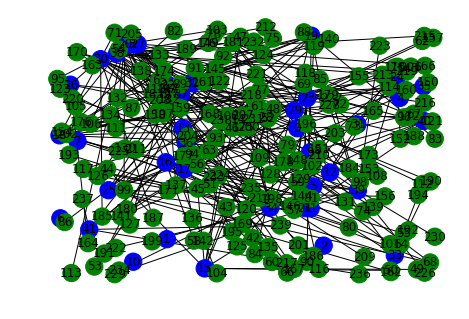

In [27]:
nx.draw_random(G, node_color=color_map, with_labels=True)
plt.savefig("network.png")
plt.show()

In [28]:
print(nx.clustering(G))
print(nx.average_clustering(G))

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 0, 138: 

In [32]:
print(nx.reciprocity(G))

0.0
